In [1]:
import pyvisa


In [13]:
import pyvisa
# pyvisa.log_to_screen()

visa_path = r"C:/Windows/System32/visa64.dll"
rm = pyvisa.ResourceManager(visa_path)
devices = rm.list_resources()


2025-03-07 20:48:02,325 - pyvisa - DEBUG - Reusing ResourceManager with session 1
2025-03-07 20:48:02,325 - pyvisa - DEBUG - Reusing ResourceManager with session 1
2025-03-07 20:48:02,412 - pyvisa - DEBUG - viFindRsrc(1, '?*::INSTR', '<ViObject object at 0x00000143B2465BC0>', 'c_ulong(2)', <ctypes.c_char_Array_256 object at 0x00000143B2377740>) -> 0
2025-03-07 20:48:02,412 - pyvisa - DEBUG - viFindRsrc(1, '?*::INSTR', '<ViObject object at 0x00000143B2465BC0>', 'c_ulong(2)', <ctypes.c_char_Array_256 object at 0x00000143B2377740>) -> 0
2025-03-07 20:48:02,413 - pyvisa - DEBUG - viFindNext(<ViObject object at 0x00000143B2465BC0>, <ctypes.c_char_Array_256 object at 0x00000143B24662C0>) -> 0
2025-03-07 20:48:02,413 - pyvisa - DEBUG - viFindNext(<ViObject object at 0x00000143B2465BC0>, <ctypes.c_char_Array_256 object at 0x00000143B24662C0>) -> 0
2025-03-07 20:48:02,414 - pyvisa - DEBUG - viClose(<ViObject object at 0x00000143B2465BC0>,) -> 0
2025-03-07 20:48:02,414 - pyvisa - DEBUG - viClose

In [14]:

print("Connected instruments:")
for i, device in enumerate(devices):
    print(f"{i}:", device)


Connected instruments:
0: USB0::0x0699::0x036A::C100158::INSTR
1: ASRL5::INSTR


In [15]:

scope = rm.open_resource(devices[0])  

2025-03-07 20:48:04,007 - pyvisa - DEBUG - viParseRsrcEx(1, 'USB0::0x0699::0x036A::C100158::INSTR', 'c_ushort(7)', 'c_ushort(0)', <ctypes.c_char_Array_256 object at 0x00000143B24662C0>, <ctypes.c_char_Array_256 object at 0x00000143B2377740>, <ctypes.c_char_Array_256 object at 0x00000143B2376F40>) -> 0
2025-03-07 20:48:04,007 - pyvisa - DEBUG - viParseRsrcEx(1, 'USB0::0x0699::0x036A::C100158::INSTR', 'c_ushort(7)', 'c_ushort(0)', <ctypes.c_char_Array_256 object at 0x00000143B24662C0>, <ctypes.c_char_Array_256 object at 0x00000143B2377740>, <ctypes.c_char_Array_256 object at 0x00000143B2376F40>) -> 0
2025-03-07 20:48:04,009 - pyvisa - DEBUG - USB0::0x0699::0x036A::C100158::0::INSTR - opening ...
2025-03-07 20:48:04,009 - pyvisa - DEBUG - USB0::0x0699::0x036A::C100158::0::INSTR - opening ...
2025-03-07 20:48:04,015 - pyvisa - DEBUG - viOpen(1, 'USB0::0x0699::0x036A::C100158::0::INSTR', <AccessModes.no_lock: 0>, 0, '<ViObject object at 0x00000143B2465BC0>') -> 0
2025-03-07 20:48:04,015 - p

In [16]:
print(scope.query('*IDN?'))  # Should return Tektronix TDS2024B info


2025-03-07 20:48:04,880 - pyvisa - DEBUG - viWrite(5, b'*IDN?\r\n', 7, 'c_ulong(7)') -> 0
2025-03-07 20:48:04,880 - pyvisa - DEBUG - viWrite(5, b'*IDN?\r\n', 7, 'c_ulong(7)') -> 0
2025-03-07 20:48:04,881 - pyvisa - DEBUG - USB0::0x0699::0x036A::C100158::0::INSTR - reading 20480 bytes (last status <StatusCode.success_max_count_read: 1073676294>)
2025-03-07 20:48:04,881 - pyvisa - DEBUG - USB0::0x0699::0x036A::C100158::0::INSTR - reading 20480 bytes (last status <StatusCode.success_max_count_read: 1073676294>)
2025-03-07 20:48:04,943 - pyvisa - DEBUG - viRead(5, <ctypes.c_char_Array_20480 object at 0x00000143B2377640>, 20480, 'c_ulong(48)') -> 0
2025-03-07 20:48:04,943 - pyvisa - DEBUG - viRead(5, <ctypes.c_char_Array_20480 object at 0x00000143B2377640>, 20480, 'c_ulong(48)') -> 0


TEKTRONIX,TDS 2024B,C100158,CF:91.1CT FV:v22.16



In [17]:

scope.write('DATA:SOURCE CH1')  # Select channel
scope.write('DATA:WIDTH 1')      # Set data width
scope.write('DATA:ENC RPB')      # Set encoding (RPB = Binary)


2025-03-07 20:48:06,098 - pyvisa - DEBUG - viWrite(5, b'DATA:SOURCE CH1\r\n', 17, 'c_ulong(17)') -> 0
2025-03-07 20:48:06,098 - pyvisa - DEBUG - viWrite(5, b'DATA:SOURCE CH1\r\n', 17, 'c_ulong(17)') -> 0
2025-03-07 20:48:06,100 - pyvisa - DEBUG - viWrite(5, b'DATA:WIDTH 1\r\n', 14, 'c_ulong(14)') -> 0
2025-03-07 20:48:06,100 - pyvisa - DEBUG - viWrite(5, b'DATA:WIDTH 1\r\n', 14, 'c_ulong(14)') -> 0
2025-03-07 20:48:06,148 - pyvisa - DEBUG - viWrite(5, b'DATA:ENC RPB\r\n', 14, 'c_ulong(14)') -> 0
2025-03-07 20:48:06,148 - pyvisa - DEBUG - viWrite(5, b'DATA:ENC RPB\r\n', 14, 'c_ulong(14)') -> 0


14

In [18]:

# Get waveform preamble
preamble = scope.query('WFMPRE?')
print(f"Preamble: {preamble}")


2025-03-07 20:48:08,253 - pyvisa - DEBUG - viWrite(5, b'WFMPRE?\r\n', 9, 'c_ulong(9)') -> 0
2025-03-07 20:48:08,253 - pyvisa - DEBUG - viWrite(5, b'WFMPRE?\r\n', 9, 'c_ulong(9)') -> 0
2025-03-07 20:48:08,255 - pyvisa - DEBUG - USB0::0x0699::0x036A::C100158::0::INSTR - reading 20480 bytes (last status <StatusCode.success_max_count_read: 1073676294>)
2025-03-07 20:48:08,255 - pyvisa - DEBUG - USB0::0x0699::0x036A::C100158::0::INSTR - reading 20480 bytes (last status <StatusCode.success_max_count_read: 1073676294>)
2025-03-07 20:48:09,185 - pyvisa - DEBUG - viRead(5, <ctypes.c_char_Array_20480 object at 0x00000143B2465EC0>, 20480, 'c_ulong(144)') -> 0
2025-03-07 20:48:09,185 - pyvisa - DEBUG - viRead(5, <ctypes.c_char_Array_20480 object at 0x00000143B2465EC0>, 20480, 'c_ulong(144)') -> 0


Preamble: 1;8;BIN;RP;MSB;2500;"Ch1, DC coupling, 5.0E-1 V/div, 5.0E-5 s/div, 2500 points, Sample mode";Y;2.0E-7;0;-2.5E-4;"s";2.0E-2;0.0E0;1.78E2;"Volts"



In [19]:

# Read waveform data
scope.write('CURVE?')
waveform_data = scope.read()

2025-03-07 20:48:17,779 - pyvisa - DEBUG - viWrite(5, b'CURVE?\r\n', 8, 'c_ulong(8)') -> 0
2025-03-07 20:48:17,779 - pyvisa - DEBUG - viWrite(5, b'CURVE?\r\n', 8, 'c_ulong(8)') -> 0
2025-03-07 20:48:17,781 - pyvisa - DEBUG - USB0::0x0699::0x036A::C100158::0::INSTR - reading 20480 bytes (last status <StatusCode.success_max_count_read: 1073676294>)
2025-03-07 20:48:17,781 - pyvisa - DEBUG - USB0::0x0699::0x036A::C100158::0::INSTR - reading 20480 bytes (last status <StatusCode.success_max_count_read: 1073676294>)
2025-03-07 20:48:17,979 - pyvisa - DEBUG - viRead(5, <ctypes.c_char_Array_20480 object at 0x00000143B08D2840>, 20480, 'c_ulong(2507)') -> 0
2025-03-07 20:48:17,979 - pyvisa - DEBUG - viRead(5, <ctypes.c_char_Array_20480 object at 0x00000143B08D2840>, 20480, 'c_ulong(2507)') -> 0


UnicodeDecodeError: 'ascii' codec can't decode byte 0xb1 in position 6: ordinal not in range(128)

In [ ]:


# Process and save data
with open("waveform.bin", "wb") as f:
    f.write(waveform_data)

print("Waveform data saved!")


2025-03-07 20:46:52,996 - pyvisa - DEBUG - USB0::0x0699::0x036A::C100158::0::INSTR - closing
2025-03-07 20:46:52,996 - pyvisa - DEBUG - USB0::0x0699::0x036A::C100158::0::INSTR - closing
2025-03-07 20:46:52,998 - pyvisa - DEBUG - viDisableEvent(3, <EventType.all_enabled: 1073709055>, <EventMechanism.all: 65535>) -> 1073676291
2025-03-07 20:46:52,998 - pyvisa - DEBUG - viDisableEvent(3, <EventType.all_enabled: 1073709055>, <EventMechanism.all: 65535>) -> 1073676291
2025-03-07 20:46:52,999 - pyvisa - DEBUG - viDiscardEvents(3, <EventType.all_enabled: 1073709055>, <EventMechanism.all: 65535>) -> 1073676292
2025-03-07 20:46:52,999 - pyvisa - DEBUG - viDiscardEvents(3, <EventType.all_enabled: 1073709055>, <EventMechanism.all: 65535>) -> 1073676292
2025-03-07 20:46:53,001 - pyvisa - DEBUG - viClose(3,) -> 0
2025-03-07 20:46:53,001 - pyvisa - DEBUG - viClose(3,) -> 0
2025-03-07 20:46:53,002 - pyvisa - DEBUG - USB0::0x0699::0x036A::C100158::0::INSTR - is closed
2025-03-07 20:46:53,002 - pyvisa 

Waveform data saved!


In [ ]:

# Close connection
scope.close()

2025-03-07 20:53:51,306 - pyvisa - DEBUG - No visa library specified, trying to find alternatives.
2025-03-07 20:53:51,306 - pyvisa - DEBUG - No visa library specified, trying to find alternatives.
2025-03-07 20:53:51,307 - pyvisa - DEBUG - Environment variable PYVISA_LIBRARY is unset.
2025-03-07 20:53:51,307 - pyvisa - DEBUG - Environment variable PYVISA_LIBRARY is unset.
2025-03-07 20:53:51,308 - pyvisa - DEBUG - No user defined configuration
2025-03-07 20:53:51,308 - pyvisa - DEBUG - No user defined configuration
2025-03-07 20:53:51,313 - pyvisa - DEBUG - Automatically found library files: [None, 'C:\\WINDOWS\\system32\\visa32.dll', 'C:\\WINDOWS\\system32\\visa32.dll', 'C:\\WINDOWS\\system32\\visa64.dll', 'C:\\WINDOWS\\system32\\visa64.dll']
2025-03-07 20:53:51,313 - pyvisa - DEBUG - Automatically found library files: [None, 'C:\\WINDOWS\\system32\\visa32.dll', 'C:\\WINDOWS\\system32\\visa32.dll', 'C:\\WINDOWS\\system32\\visa64.dll', 'C:\\WINDOWS\\system32\\visa64.dll']
2025-03-07 2

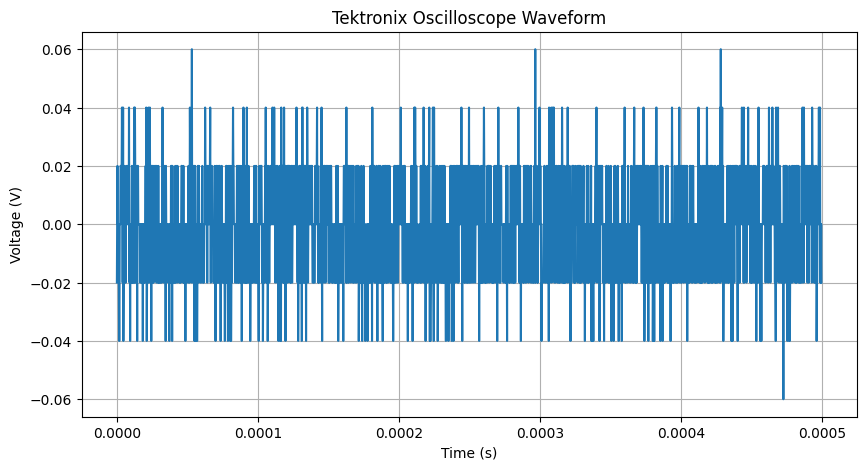

In [22]:
import pyvisa
import numpy as np
import matplotlib.pyplot as plt

# Connect to the oscilloscope
rm = pyvisa.ResourceManager()
scope = rm.open_resource(devices[0])  # Replace with your scope's VISA address

# Configure scope for binary data transfer
scope.write("DATA:SOURCE CH1")       # Select Channel 1
scope.write("DATA:ENCdg SRIBINARY")  # Signed binary format
scope.write("DATA:WIDTH 1")          # 1-byte per data point
scope.write("DATA:START 1")          # Start at first point
scope.write("DATA:STOP 10000")       # Stop at 10,000 points

# Get waveform preamble for scaling
ymult = float(scope.query("WFMPRE:YMULT?"))   # Vertical scale factor
yzero = float(scope.query("WFMPRE:YZERO?"))   # Vertical offset
yoff = float(scope.query("WFMPRE:YOFF?"))     # Vertical reference level
xincr = float(scope.query("WFMPRE:XINCR?"))   # Time step per sample

# Read waveform data
scope.write("CURVE?")
raw_data = scope.read_raw()  # Read binary response

# Process binary data (remove header)
header_len = 2 + int(chr(raw_data[1]))  # Example: #450000 (4-digit length header)
binary_waveform = np.frombuffer(raw_data[header_len:], dtype=np.int8)  # Convert to numpy array

# Convert to actual voltage values
voltage_waveform = (binary_waveform - yoff) * ymult + yzero

# Generate time axis
time_axis = np.arange(0, len(voltage_waveform) * xincr, xincr)

# Plot the waveform
plt.figure(figsize=(10, 5))
plt.plot(time_axis[:-1], voltage_waveform[:-1])
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Tektronix Oscilloscope Waveform")
plt.grid()
plt.show()
